In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory




In [2]:
!pip3 install wfdb

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import wfdb
import matplotlib.pyplot as plt

In [4]:
import glob

In [24]:
recordname = "/Users/ishaan28/Downloads/apnea-ecg-database-1.0.0/"
annotationsDir = "/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/"

In [25]:
def record_locater(record_id):
  return recordname + record_id

record = wfdb.rdsamp(record_locater("a04"))

Text(0, 0.5, 'ECG (mV)')

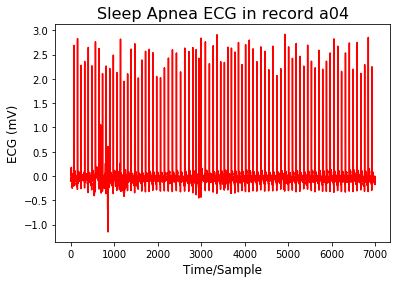

In [26]:
plt.plot(record[0][213000:220000],'r')
plt.title("Sleep Apnea ECG in record a04", fontsize=16)
plt.xlabel("Time/Sample", fontsize=12)
plt.ylabel("ECG (mV)",fontsize=12)

In [27]:
print(record[1])

{'fs': 100, 'sig_len': 2980000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['ECG'], 'comments': []}


In [28]:
def spilt_data(record):
  splitarray = []
  count = 0
  for x in range(len(record[0])):
    if(count+25000 > len(record[0])):
      splitarray.append(record[0][count:])
    else:
      splitarray.append(record[0][count:count+25000])
    count += 25000

Text(0, 0.5, 'ECG (mV)')

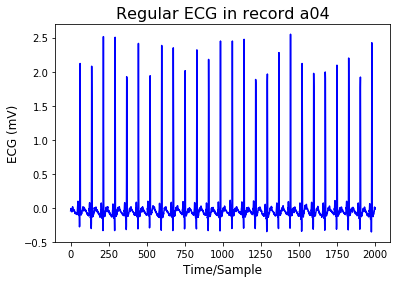

In [29]:
plt.plot(record[0][4000:6000],'b')
plt.title("Regular ECG in record a04", fontsize=16)
plt.xlabel("Time/Sample", fontsize=12)
plt.ylabel("ECG (mV)",fontsize=12)


In [40]:
def mapAnnotation():
  annotations = glob.glob(annotationsDir + '*.txt')
  print(annotations)
mapAnnotation()

['/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/a18.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/a19.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/c08.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/c09.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/a09.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/a08.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/a20.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/a11.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/a05.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/c07.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/c06.txt', '/Users/ishaan28/Desktop/GitHub/sleep_apnea/data/interpreted-annotations/a04.txt', '/U

In [38]:
def split_annotations(record):
  splitannotations = []
  count = 0
  for x in range(len(annotation)):
    if(count+25000 > len(annotation)):
      splitannotations.append(annotation[count:])
    else:
      splitannotations.append(annotation[count:count+25000])
    count += 25000

In [39]:
annotation.contained_labels
annotation.get_label_fields()
annotation.symbol[:10]

NameError: name 'annotation' is not defined

In [33]:
annotation.contained_labels

NameError: name 'annotation' is not defined

In [0]:
annotation.get_label_fields()

In [0]:
annotation.symbol[:10]

In [0]:
labels = np.array(annotation.symbol)
intervals = np.array(annotation.sample)

In [0]:
apnea_idx = np.where(labels=='A')    

In [0]:
apnea_idx

In [0]:
apnea_intervals = intervals[apnea_idx]

In [0]:
record[0]


In [41]:
import tensorflow as tf


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [43]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [44]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)


NameError: name 'x_train' is not defined

In [0]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)